<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Gr%C3%A1fico_Autocorrela%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 25.04.22.Dados.csv to 25.04.22.Dados.csv


<Figure size 1200x500 with 0 Axes>

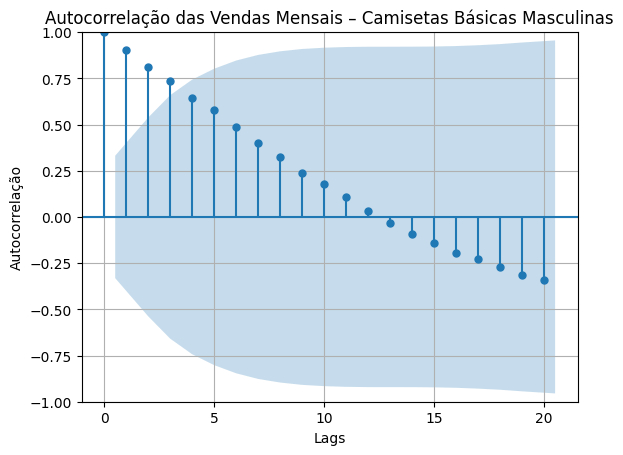

In [1]:
import io
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from google.colab import files
from statsmodels.graphics.tsaplots import plot_acf

# --- 1. Upload do arquivo CSV ---------------------------
uploaded = files.upload()
nome_arquivo = next(iter(uploaded))
raw = uploaded[nome_arquivo]

# --- 2. Detectar encoding e separador -------------------
encoding = chardet.detect(raw[:8000])['encoding'] or 'latin-1'
first_line = raw.split(b'\n', 1)[0].decode(encoding, errors='ignore')
sep = ',' if first_line.count(',') > first_line.count(';') else ';'

# --- 3. Ler o CSV ---------------------------------------
dados = pd.read_csv(io.BytesIO(raw), encoding=encoding, sep=sep)

# --- 4. Definir colunas ---------------------------------
col_data = 'Timestamp'
col_vendas = 'Camisetas_básicas_masculinas'

# Converter Timestamp para datetime
dados[col_data] = pd.to_datetime(dados[col_data], dayfirst=True, errors='coerce')

# --- 5. Criar coluna de Month e calcular média mensal ---
dados['Month'] = dados[col_data].dt.to_period('M')

mes_media = (
    dados.dropna(subset=['Month', col_vendas])
         .groupby('Month', as_index=False)[col_vendas]
         .mean()
         .rename(columns={col_vendas: 'Media'})
         .sort_values('Month')
)

# --- 6. Plot Autocorrelação -----------------------------
plt.figure(figsize=(12, 5))
plot_acf(mes_media['Media'], lags=20)
plt.title('Autocorrelação das Vendas Mensais – Camisetas Básicas Masculinas')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()